# Covid effect study on product mix sales
**Project indends to investigate the COVID 19 crisis effect in customers purchase patterns**
* Author : Dimitris Mantaos


In [5]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt


* Read data for Year 2019 and Year 2020

In [6]:
products_2019 = pd.read_excel('Covid_products_study_2019.xlsx')

In [7]:
products_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2839 entries, 0 to 2838
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cuscode      2839 non-null   object
 1   Domestic     2839 non-null   int64 
 2   Basket_2019  2839 non-null   object
dtypes: int64(1), object(2)
memory usage: 66.7+ KB


In [8]:
products_2019.head()

,Cuscode,Domestic,Basket_2019
0,A.00001,0,"0015027000, 0018007003, 0025006010, 0025006011..."
1,A.00008,0,"0025022020, 0094013002, 0094079001, 0095004000..."
2,A.00023,0,0005001010
3,A.00028,0,"0001026020, 0015035000, 0068001001, 0105003001..."
4,A.00032,0,"0009001002, 0015027000, 0015042001, 0025006000..."


In [8]:
#local = products_2019[products_2019["Domestic"] == 1]

In [9]:
#local

In [9]:
products_2020 = pd.read_excel('Covid_products_study_2020.xlsx')

In [10]:
products_2020.head()

,Cuscode,Domestic,Basket_2020
0,A.00001,0,"0015027000, 0015035001, 0018007003, 0025006011..."
1,A.00008,0,"0025022020, 0094013002, 0094079001, 0095004000..."
2,A.00023,0,0005001010
3,A.00028,0,"0001026020, 0015035000, 0068001001, 0135000000"
4,A.00032,0,"0015027000, 0015042001, 0025006000, 0025006010..."


* We merge the two files 

In [11]:
products_total = pd.merge(products_2019, products_2020, on=["Cuscode"])

In [12]:
products_total.shape

(2154, 5)

In [13]:
products_total.info

<bound method DataFrame.info of       Cuscode  Domestic_x                                        Basket_2019  \
0     A.00001           0  0015027000, 0018007003, 0025006010, 0025006011...   
1     A.00008           0  0025022020, 0094013002, 0094079001, 0095004000...   
2     A.00023           0                                         0005001010   
3     A.00028           0  0001026020, 0015035000, 0068001001, 0105003001...   
4     A.00032           0  0009001002, 0015027000, 0015042001, 0025006000...   
...       ...         ...                                                ...   
2149  L.00166           1                                         0095005000   
2150  L.00170           1                                         0003001000   
2151  L.00183           1                                         0135008000   
2152  L.00184           1  0010007001, 0017001002, 0025006000, 0025006010...   
2153  L.00185           1                 0032000014, 0115005009, 0150003000   

      D

In [14]:
products_total.head()

,Cuscode,Domestic_x,Basket_2019,Domestic_y,Basket_2020
0,A.00001,0,"0015027000, 0018007003, 0025006010, 0025006011...",0,"0015027000, 0015035001, 0018007003, 0025006011..."
1,A.00008,0,"0025022020, 0094013002, 0094079001, 0095004000...",0,"0025022020, 0094013002, 0094079001, 0095004000..."
2,A.00023,0,0005001010,0,0005001010
3,A.00028,0,"0001026020, 0015035000, 0068001001, 0105003001...",0,"0001026020, 0015035000, 0068001001, 0135000000"
4,A.00032,0,"0009001002, 0015027000, 0015042001, 0025006000...",0,"0015027000, 0015042001, 0025006000, 0025006010..."


## Similarity metrics . Implement SequenceMatcher and Jaccard similarity methods


_Calculate similarity between the market baskets for Years 2019 and 2020_

In [15]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [16]:
round(similar(products_total["Basket_2019"][4], products_total["Basket_2020"][4]),2)

0.86

In [18]:
import numpy as np

def jaccard(str1, str2) :
    list1 = str1.split(", ")
    list2 = str2.split(", ")
    #print(list1)
    intersection = len(list(set(list1).intersection(list2)))
    #print(intersection)
    union = (len(list1) + len(list2)) - intersection
    #print(union)
    return float(intersection) / union


#jaccard(["0015027000", "0018007003", "0025006010", "0025006011"], ["0015027000","0025006011"])
round(jaccard(products_total["Basket_2019"][4], products_total["Basket_2020"][4]),2)

0.67

In [19]:
products_total.reset_index(drop = True)

,Cuscode,Domestic_x,Basket_2019,Domestic_y,Basket_2020
0,A.00001,0,"0015027000, 0018007003, 0025006010, 0025006011...",0,"0015027000, 0015035001, 0018007003, 0025006011..."
1,A.00008,0,"0025022020, 0094013002, 0094079001, 0095004000...",0,"0025022020, 0094013002, 0094079001, 0095004000..."
2,A.00023,0,0005001010,0,0005001010
3,A.00028,0,"0001026020, 0015035000, 0068001001, 0105003001...",0,"0001026020, 0015035000, 0068001001, 0135000000"
4,A.00032,0,"0009001002, 0015027000, 0015042001, 0025006000...",0,"0015027000, 0015042001, 0025006000, 0025006010..."
...,...,...,...,...,...
2149,L.00166,1,0095005000,1,0095005000
2150,L.00170,1,0003001000,1,0003001000
2151,L.00183,1,0135008000,1,"0135000000, 0135008000"
2152,L.00184,1,"0010007001, 0017001002, 0025006000, 0025006010...",1,"0010003001, 0010005001, 0015027000, 0018013001..."


In [20]:
products_total["Basket_2020"][1:4]

1    0025022020, 0094013002, 0094079001, 0095004000...
2                                           0005001010
3       0001026020, 0015035000, 0068001001, 0135000000
Name: Basket_2020, dtype: object

* Compare the results between the two methods

In [21]:
for i in range (1,10) :
     print(similar(products_total["Basket_2019"][i], products_total["Basket_2020"][i]))
     print(jaccard(products_total["Basket_2019"][i], products_total["Basket_2020"][i]))
     print('____________________')

0.9210526315789473
0.8571428571428571
____________________
1.0
1.0
____________________
0.6571428571428571
0.5
____________________
0.8559322033898306
0.6666666666666666
____________________
0.847457627118644
0.6666666666666666
____________________
1.0
1.0
____________________
0.8536585365853658
0.75
____________________
0.6875
0.35714285714285715
____________________
0.7711864406779662
0.42857142857142855
____________________


In [22]:
sim_sim = []
sim_jac = []
for i in range (len(products_total)):
    sim_sim_t = similar(products_total["Basket_2019"][i], products_total["Basket_2020"][i])
    sim_sim.append(sim_sim_t)
    sim_jac_t = jaccard(products_total["Basket_2019"][i], products_total["Basket_2020"][i])
    sim_jac.append(sim_jac_t)

In [23]:
sim_data = pd.DataFrame(sim_sim)
jac_data = pd.DataFrame(sim_jac)

In [24]:
sim_data.rename(columns={0: "Similarity"}, inplace = True)
jac_data.rename(columns={0: "Jaccard"}, inplace = True)

In [25]:
sim_data['Jaccard'] = jac_data['Jaccard']
sim_data

,Similarity,Jaccard
0,0.889831,0.666667
1,0.921053,0.857143
2,1.000000,1.000000
3,0.657143,0.500000
4,0.855932,0.666667
...,...,...
2149,1.000000,1.000000
2150,1.000000,1.000000
2151,0.625000,0.500000
2152,0.798387,0.312500


In [26]:
avg_sim = sim_data.Similarity.mean(axis=0)
avg_jac = sim_data.Jaccard.mean(axis=0)

print(avg_sim)
print(avg_jac)

0.6838582975737337
0.4502697556233573


In [27]:
max_sim = sim_data.Similarity.max(axis=0)
max_jac = sim_data.Jaccard.max(axis=0)

print(max_sim)
print(max_jac)

1.0
1.0


In [28]:
min_sim = sim_data.Similarity.min(axis=0)
min_jac = sim_data.Jaccard.min(axis=0)

print(min_sim)
print(min_jac)

0.08152173913043478
0.0


In [29]:
stdv_sim = sim_data.Similarity.std(axis=0)
stdv_jac = sim_data.Jaccard.std(axis=0)

print(stdv_sim)
print(stdv_jac)

0.20929213733285942
0.2835066763709561


array([[<AxesSubplot:title={'center':'Similarity'}>,
        <AxesSubplot:title={'center':'Jaccard'}>]], dtype=object)

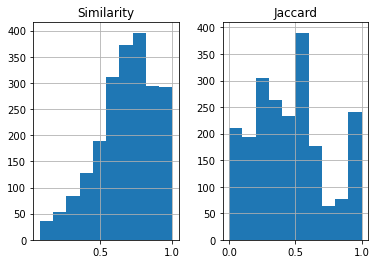

In [30]:
sim_data.hist()

* It is obvious that the two methods provide differenct results and  shapes. Subject will be analyzed further.

## Now we will calculate similarity for customers of category a (VIP customers)

* Read the file that containg information about customers segmentation 

In [31]:
customer_base = pd.read_excel('Customer_profile.xlsx', sheet_name='customers_profile_2021')
customer_base.tail()

,CardCode,CustomerRank,Domestic,Attika,Territory,U_GRSL,U_ZeeKey2,SZSegmentation,MarketSegmentation,Subsegment,SlpCode,AvgPayDays,PaymentTerms,AvgLatePayDays,Tziros,AvgSVal,MaxSval,invNo,AvgInvNoPerMonth,Basket
2482,L.00203,1424,1,1,108,11.0,2,c,C,1,140,32.51,30,3,838.23,39.92,209.50,21,1,"0129000001, 0025006000, 0135000000, 0025017001..."
2483,L.00205,1267,1,1,108,2.0,2,c,C,1,140,69.68,30,40,1072.73,59.60,135.80,18,2,"0127010000, 0025017001, 0017001002, 0010008001..."
2484,L.00206,2153,1,1,108,1.0,2,c,B,2,140,96.25,62,34,222.58,74.19,95.56,3,3,"0026008002, 0094083001, 0094084000"
2485,L.00207,1080,1,1,108,1.0,2,c,B,2,140,19.37,62,-43,1460.91,63.52,301.46,23,2,"0196001005, 0094083001, 0196001001, 0196000003..."
2486,L.00209,764,1,1,108,8.0,2,b,B,4,140,0.00,62,-62,2566.35,285.15,1950.09,9,4,"0025014000, 0041002001, 0041003001, 0015019000..."


In [32]:
customer_data = customer_base[["CardCode","Domestic","Attika", "SZSegmentation"]]

In [33]:
customer_data.rename(columns={'CardCode':'Cuscode'}, inplace=True)

C:\Users\netadmin\Anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [34]:
customer_data.head()

,Cuscode,Domestic,Attika,SZSegmentation
0,A.00001,0,1,NaN
1,A.00008,0,1,NaN
2,A.00023,0,1,NaN
3,A.00028,0,1,NaN
4,A.00032,0,1,NaN


In [35]:
customers_combined = pd.merge(products_total, customer_data, on=["Cuscode"])

In [36]:
customers_combined.tail()

,Cuscode,Domestic_x,Basket_2019,Domestic_y,Basket_2020,Domestic,Attika,SZSegmentation
1821,L.00153,1,"0025006000, 0025006011",1,"0010005001, 0025006000, 0025006003, 0025006011",1,1,b
1822,L.00157,1,"0001016000, 0004001001, 0010005001, 0032000000...",1,"0001016000, 0004001001, 0009001008, 0025006000...",1,1,b
1823,L.00160,1,0009001008,1,"0001016000, 0009001003, 0009001008, 0010005001",1,1,c
1824,L.00161,1,"0026008002, 0094093000, 0110020001, 0110022001...",1,"0015027000, 0025006080, 0026008002, 0064001003...",1,1,b
1825,L.00184,1,"0010007001, 0017001002, 0025006000, 0025006010...",1,"0010003001, 0010005001, 0015027000, 0018013001...",1,1,a


In [37]:
customers_a = customers_combined[customers_combined["SZSegmentation"] == "a"]

In [38]:
customers_a = customers_a[["Cuscode", "Basket_2019", "Basket_2020"]]



In [39]:
customers_a.head()

,Cuscode,Basket_2019,Basket_2020
20,A.00126,"0001016000, 0015027000, 0025006012, 0026007002...","0001016000, 0015027000, 0025006012, 0026007002..."
24,A.00161,"0010005001, 0015027000, 0025017001, 0025022030...","0010005001, 0015027000, 0025006000, 0025006045..."
25,A.00162,"0010005001, 0025006000, 0025006003, 0025006013...","0010005001, 0025006000, 0025006080, 0032000014..."
26,A.00165,"0010005001, 0010008001, 0025006000, 0025017001...","0010005001, 0010008001, 0017001002, 0025006000..."
29,A.00168,"0010005001, 0025022030, 0026012001, 0026013001...","0010005001, 0025017001, 0025022030, 0026012001..."


In [40]:
customers_a = customers_a.reset_index()


In [41]:
customers_a.head()

,index,Cuscode,Basket_2019,Basket_2020
0,20,A.00126,"0001016000, 0015027000, 0025006012, 0026007002...","0001016000, 0015027000, 0025006012, 0026007002..."
1,24,A.00161,"0010005001, 0015027000, 0025017001, 0025022030...","0010005001, 0015027000, 0025006000, 0025006045..."
2,25,A.00162,"0010005001, 0025006000, 0025006003, 0025006013...","0010005001, 0025006000, 0025006080, 0032000014..."
3,26,A.00165,"0010005001, 0010008001, 0025006000, 0025017001...","0010005001, 0010008001, 0017001002, 0025006000..."
4,29,A.00168,"0010005001, 0025022030, 0026012001, 0026013001...","0010005001, 0025017001, 0025022030, 0026012001..."


In [42]:
sim_sima = []
sim_jaca = []
for i in range (len(customers_a)):
    sim_sim_t = similar(customers_a["Basket_2019"][i], customers_a["Basket_2020"][i])
    sim_sima.append(sim_sim_t)
    sim_jac_t = jaccard(customers_a["Basket_2019"][i], customers_a["Basket_2020"][i])
    sim_jaca.append(sim_jac_t)

In [43]:
sima_data = pd.DataFrame(sim_sima)
jaca_data = pd.DataFrame(sim_jaca)

In [44]:
sima_data.rename(columns={0: "Similarity_a"}, inplace = True)
jaca_data.rename(columns={0: "Jaccard_a"}, inplace = True)

In [45]:
sima_data['Jaccard_a'] = jaca_data['Jaccard_a']
sima_data

,Similarity_a,Jaccard_a
0,1.000000,1.000000
1,0.694915,0.538462
2,0.550847,0.250000
3,0.746479,0.600000
4,0.815385,0.692308
...,...,...
302,0.806452,0.312500
303,0.314286,0.090909
304,0.644068,0.176471
305,0.822034,0.333333


In [46]:
avg_sima = sima_data.Similarity_a.mean(axis=0)
avg_jaca = sima_data.Jaccard_a.mean(axis=0)

print(avg_sima)
print(avg_jaca)

0.758905268455059
0.5074445001347968


**We notice that similarity for customers of category a is .78 which is significantly higher than the average of the full dataset which is .68. This makes sense since customers a are business with strength and are not such vonurable to market changes**
**Jaccard similarity results seem not rational, so we ommit this method in our report**

### Just for reporting purposes we performed the same analysis for customers of category "b" and "c". As results were just repeated we ommit these lines from current notebook